In [4]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('soft.csv');
#df.head(2)
df.head(5)

,Time,Fault
0,0,0
1,1,6
2,2,1
3,3,1
4,4,0


In [8]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)

df.head(5)

,Time,Fault,Fault1,Time1
0,0,0,0,0
1,1,6,6,1
2,2,13,7,2
3,3,21,8,3
4,4,29,8,4


In [9]:
#ax = sns.distplot(df)

In [10]:
df['Fault1']=df['Fault']
df['Time1']=df[df.columns[0]]

In [11]:

df.Fault1=df.Fault1.astype(float)
df.Time1=df.Time1.astype(float)


In [12]:
df.head(10)

,Time,Fault,Fault1,Time1
0,0,0,0.0,0.0
1,1,6,6.0,1.0
2,2,13,13.0,2.0
3,3,21,21.0,3.0
4,4,29,29.0,4.0
5,5,38,38.0,5.0
6,6,50,50.0,6.0
7,7,62,62.0,7.0
8,8,79,79.0,8.0
9,9,102,102.0,9.0


In [13]:

length= len(df['Fault1'])
for i in range(1,length):
    df['Fault1'][i]=math.log(df['Fault'][i],10)
    df['Time1'][i] =math.log(df[df.columns[0]][i],10)  

  
    
   

<ipython-input-13-cbee7143bcb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault1'][i]=math.log(df['Fault'][i],10)
<ipython-input-13-cbee7143bcb6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time1'][i] =math.log(df[df.columns[0]][i],10)


In [14]:
print(df.head(11))

     Time  Fault    Fault1     Time1
0       0      0  0.000000  0.000000
1       1      6  0.778151  0.000000
2       2     13  1.113943  0.301030
3       3     21  1.322219  0.477121
4       4     29  1.462398  0.602060
5       5     38  1.579784  0.698970
6       6     50  1.698970  0.778151
7       7     62  1.792392  0.845098
8       8     79  1.897627  0.903090
9       9    102  2.008600  0.954243
10     10    126  2.100371  1.000000


In [15]:
mean_x=np.mean(df['Time1'])
mean_y=np.mean(df['Fault1'])

numer=0.0
dnum=0.0


In [16]:
for i in range(length):
    numer+=(df['Time1'][i]-mean_x)*(df['Fault1'][i]-mean_y)
    dnum+=(df['Time1'][i]-mean_x)*(df['Time1'][i]-mean_x)
    

In [17]:
cof_= numer/dnum
print(cof_)

1.8126586404426144


In [18]:
intercept_=mean_y -(mean_x*cof_)
print(intercept_)

0.35843791709401884


In [19]:
def predeict(x):
    return x*cof_+intercept_


In [20]:
#predeict(1)
predeict(math.log(6,10))

1.7689605046731545

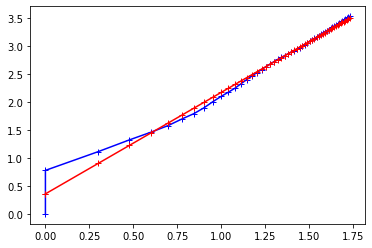

In [23]:
plt.xlabel='Year'
plt.ylabel='Fault'
#plt.scatter(df.Year,df.percent,color='RED', marker='+')
plt.plot(df['Time1'],df.Fault1,color='blue',marker='+')
plt.plot(df['Time1'], predeict(df['Time1']),color='RED',marker='+')



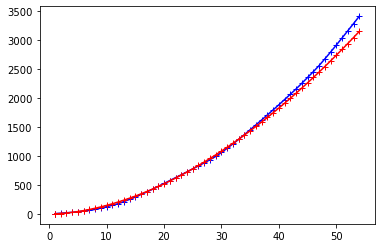

In [26]:
plt.plot(10**df['Time1'],10**df.Fault1,color='blue',marker='+')
plt.plot(10**df['Time1'],10** predeict(df['Time1']),color='RED',marker='+')